C:\Users\sanja\AppData\Local\Temp\ipykernel_7872\962178193.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  monthly_sales = pd.read_sql('SELECT Month, SUM(Sales) as TotalSales FROM sales GROUP BY Month', connection)


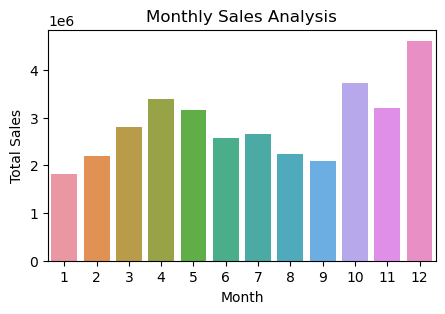

C:\Users\sanja\AppData\Local\Temp\ipykernel_7872\962178193.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  hourly_sales = pd.read_sql('SELECT Hour, COUNT(*) as SalesCount FROM sales GROUP BY Hour', connection)


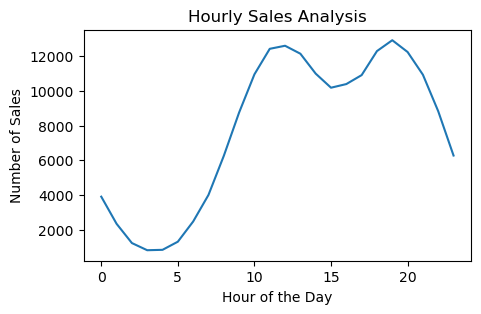

C:\Users\sanja\AppData\Local\Temp\ipykernel_7872\962178193.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  city_sales = pd.read_sql('SELECT city, SUM(Sales) as TotalSales FROM sales GROUP BY city', connection)


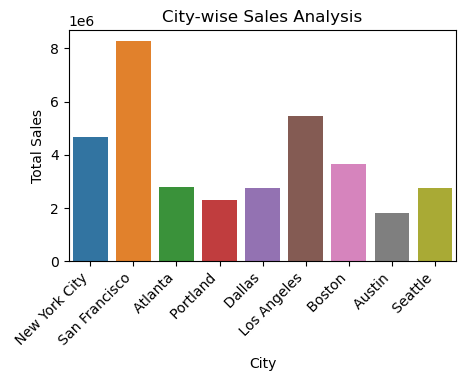

C:\Users\sanja\AppData\Local\Temp\ipykernel_7872\962178193.py:48: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  product_sales = pd.read_sql('SELECT Product, SUM(Sales) as TotalSales FROM sales GROUP BY Product', connection)


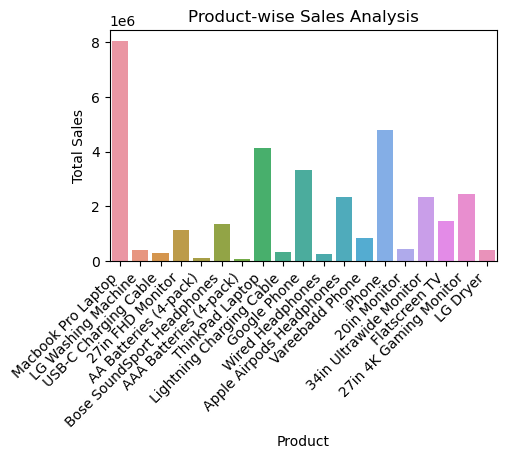

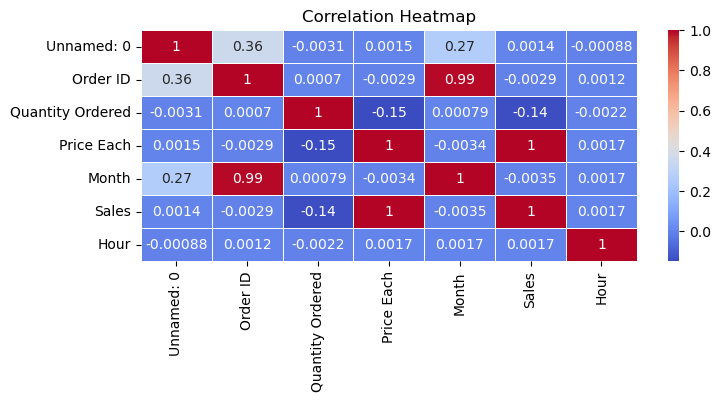

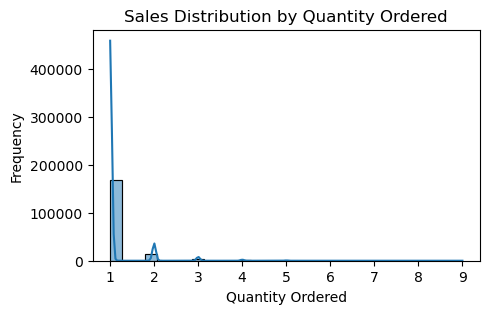

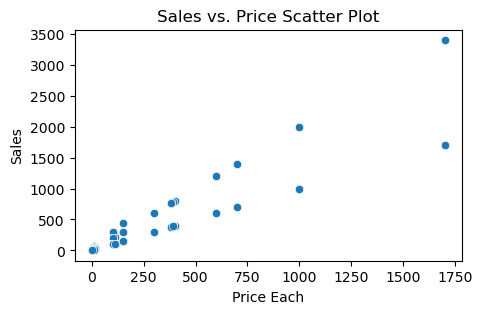

In [45]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns 

# Establish a connection to MySQL
connection = pymysql.connect(
    host='localhost',
    user='root',
    password='Sanjay@12',
    database='sales',
)

# Read the sales data from the CSV file into a DataFrame
sales_data = pd.read_csv('sales.csv')

# Data Visualization

# 1. Monthly Sales Analysis
monthly_sales = pd.read_sql('SELECT Month, SUM(Sales) as TotalSales FROM sales GROUP BY Month', connection)
plt.figure(figsize=(5, 3))
sns.barplot(x='Month', y='TotalSales', data=monthly_sales)
plt.title('Monthly Sales Analysis')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# 2. Hourly Sales Analysis
hourly_sales = pd.read_sql('SELECT Hour, COUNT(*) as SalesCount FROM sales GROUP BY Hour', connection)
plt.figure(figsize=(5,3))
sns.lineplot(x='Hour', y='SalesCount', data=hourly_sales)
plt.title('Hourly Sales Analysis')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Sales')
plt.show()

# 3. City-wise Sales Analysis
city_sales = pd.read_sql('SELECT city, SUM(Sales) as TotalSales FROM sales GROUP BY city', connection)
plt.figure(figsize=(5, 3))
sns.barplot(x='city', y='TotalSales', data=city_sales)
plt.title('City-wise Sales Analysis')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

# 4. Product-wise Sales Analysis
product_sales = pd.read_sql('SELECT Product, SUM(Sales) as TotalSales FROM sales GROUP BY Product', connection)
plt.figure(figsize=(5, 3))
sns.barplot(x='Product', y='TotalSales', data=product_sales)
plt.title('Product-wise Sales Analysis')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

# 5. Correlation Heatmap (excluding non-numeric columns)
numeric_columns = sales_data.select_dtypes(include=['number']).columns
corr = sales_data[numeric_columns].corr()
plt.figure(figsize=(8, 3))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# 6. Sales Distribution by Quantity Ordered
plt.figure(figsize=(5, 3))
sns.histplot(sales_data['Quantity Ordered'], bins=30, kde=True)
plt.title('Sales Distribution by Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.show()

# 7. Sales vs. Price Scatter Plot
plt.figure(figsize=(5, 3))
sns.scatterplot(x='Price Each', y='Sales', data=sales_data)
plt.title('Sales vs. Price Scatter Plot')
plt.xlabel('Price Each')
plt.ylabel('Sales')
plt.show()


# Close the connection
connection.close()


